In [1]:
# the notebook will reload external python modules;
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
sys.path.append('../codes')
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import torch
import random
import pandas as pd
import numpy as np

from pycocotools.coco import COCO

from detectron2.data.datasets import load_coco_json, register_coco_instances
from detectron2.data import get_detection_dataset_dicts
from detectron2.structures.boxes import Boxes, BoxMode, pairwise_iou
import seaborn as sns
from utils.img_utils import add_bboxes_on_image
from utils.register_datasets import register_mosquitoes

In [3]:
root = '../data/v1'
subset = 'test'
dataset = f'fold0_{subset}'
register_coco_instances(
    name=f'mosquitoes_{subset}',
    metadata={},
    json_file=os.path.join(root, 'coco_format_'+dataset+'.json'),    
    image_root=os.path.join(root, 'frames'),    
    )

In [4]:
register_mosquitoes()

In [5]:
dataset = 'mbg_fold0_train_tire'
data = get_detection_dataset_dicts(['mbg_fold0_train_tire', 'mbg_fold0_val_tire'], filter_empty=True)
print(len(data))


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



169


In [6]:
df = pd.read_excel("../data/v1/train_sets_kfold_v1.0.xls", sheet_name='train_sets_k1')
df.set_index('Video', inplace=True)
df

,bottle,bucket,pool,puddle,tire,water_tank,local,altitude,train,val,test
Video,,,,,,,,,,,
20180905_rectified_DJI_0010,NaN,NaN,NaN,NaN,NaN,NaN,Campo Gremio,10,NaN,NaN,1.0
20180919_rectified_DJI_0019,NaN,NaN,NaN,NaN,NaN,NaN,Atras Bloco I,15,NaN,NaN,1.0
20180919_rectified_DJI_0021,NaN,NaN,NaN,NaN,NaN,NaN,Acima bloco I (video longo),40,1.0,NaN,NaN
20181022_rectified_DJI_0025,NaN,NaN,NaN,NaN,NaN,NaN,aeroclube,15,NaN,1.0,NaN
20181022_rectified_DJI_0031,NaN,NaN,NaN,NaN,NaN,NaN,Atras FAU (wild),10,NaN,NaN,1.0
20181029_rectified_DJI_0034,NaN,NaN,NaN,NaN,NaN,NaN,CCMN,15,1.0,NaN,NaN
20181029_rectified_DJI_0038,NaN,NaN,NaN,NaN,NaN,NaN,frente FAU,20,1.0,NaN,NaN
20181112_rectified_DJI_0041,NaN,NaN,NaN,NaN,NaN,NaN,Terreno Atras Bloco I,10,NaN,1.0,NaN
20181112_rectified_DJI_0043,NaN,NaN,NaN,NaN,NaN,NaN,Acima bloco I,40,NaN,NaN,1.0


In [13]:
boxes_hist_alt = dict()

for n, d in enumerate(data):
    video_name = d['file_name'].split('/')[-2]
    alt = df.loc[video_name]['altitude']
    
    if str(alt) not in boxes_hist_alt.keys():
        boxes_hist_alt[str(alt)] = []
    
    
    for annot in d['annotations']:
        bbox = annot['bbox']
        thr = max(bbox[2], bbox[3]) 
                        
        boxes_hist_alt[str(alt)].append(thr)
        
#         if area > 6000 and alt == 40:
#             print(n, alt, area, video_name)
        
    

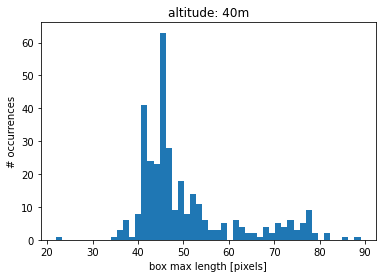

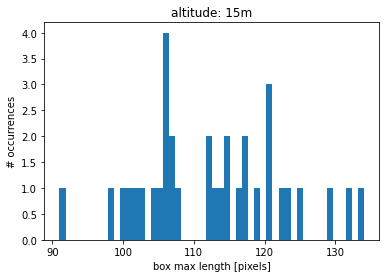

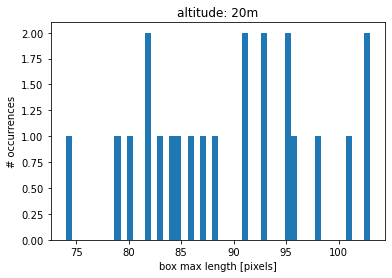

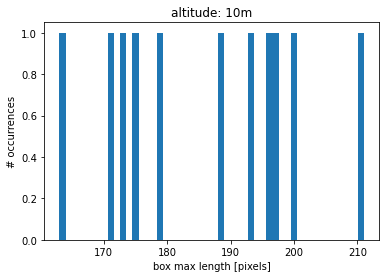

In [14]:
for alt in boxes_hist_alt.keys():
    plt.hist(boxes_hist_alt[alt], bins=50,)
    plt.title(f'altitude: {alt}m')
    plt.ylabel('# occurrences')
    plt.xlabel('box max length [pixels]')
    plt.show()

In [15]:
data[-10]

{'file_name': '/nfs/home/wesley.passos/repos/mosquitoes-wes/codes/utils/../../data/v1/frames/20181022_rectified_DJI_0025/frame_1632.png',
 'height': 2160,
 'width': 3840,
 'image_id': 342,
 'annotations': [{'iscrowd': 0,
   'bbox': [0.0, 1630.0, 104.0, 114.0],
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

In [16]:
def check_annot(indexes):
    
    for img_ind in indexes:
        sample = data[img_ind]
        
        img = Image.open(sample['file_name'])
        targets = sample['annotations']
        idx = sample['image_id']  
        
        bbs_gt = (torch.tensor([d['bbox'] for d in targets])) 
        
        if len(bbs_gt):
            bbs_gt = BoxMode.convert(bbs_gt, BoxMode.XYWH_ABS, BoxMode.XYXY_ABS)
            img_bbox = add_bboxes_on_image(np.array(img), bbs_gt, color=(0, 0, 255))
               
        
#         img_bbox = add_bboxes_on_image(np.array(img), target.bbox, color=(255,0,0))
        # plot image
        plt.imshow(img_bbox)
        plt.show()   

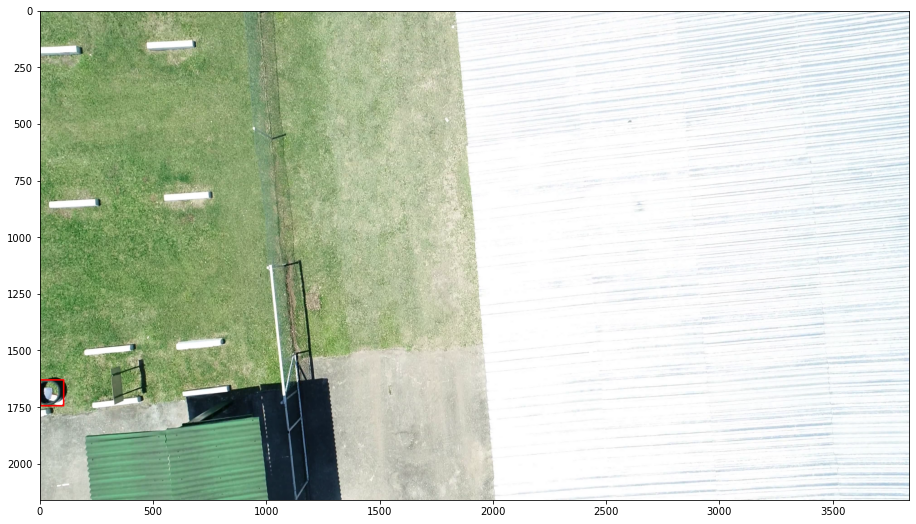

In [17]:
plt.figure(figsize=(16,9))
check_annot([-10])

In [18]:
data[44]

{'file_name': '/nfs/home/wesley.passos/repos/mosquitoes-wes/codes/utils/../../data/v1/frames/20190601_rectified_DJI_0003/frame_4872.png',
 'height': 2160,
 'width': 4096,
 'image_id': 203,
 'annotations': [{'iscrowd': 0,
   'bbox': [1936.0, 915.0, 35.0, 43.0],
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [2863.0, 720.0, 45.0, 46.0],
   'category_id': 0,
   'bbox_mode': <BoxMode.XYWH_ABS: 1>}]}

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("../data/v1/flightlogs/20190601_rectfied_DJI_0002_003_004.csv")

In [ ]:
df.head()

In [ ]:
df_copy = df.copy()
# df_copy.set_index('time(millisecond)', inplace=True)
df_copy.index = pd.to_timedelta(df_copy['time(millisecond)'],  unit='ms') - pd.to_timedelta(df_copy['time(millisecond)'],  unit='ms')[0]
df_copy

In [ ]:
def resample(df, freq='42ms'):
    # https://stackoverflow.com/questions/49191998/pandas-dataframe-resample-from-irregular-timeseries-index/55654486
    resample_index = pd.timedelta_range(start=df.index[0], end=df.index[-1], freq=freq)
    dummy_frame = pd.DataFrame(np.NaN, index=resample_index, columns=df.columns)
    
    new_df = df.combine_first(dummy_frame).interpolate('time').resample(freq).asfreq()
    
    return new_df

In [ ]:
df_interp = resample(df_copy)
df_interp

In [ ]:
tag = 'longitude'

plt.figure(figsize=(12,8))
plt.plot(df_interp.index[0:90], df_interp[tag][0:90], '.', markersize=10)
plt.plot(df_copy.index[0:30], df_copy[tag][0:30], '.', markersize=10)

# df_interp.reset_index().plot.scatter(x='index', y=tag)
# df_copy.reset_index().plot.scatter(x='index', y=tag)

plt.legend(['interp', 'orig'])

plt.show()